In [3]:
import pandas as pd
from sklearn.cluster import KMeans,SpectralClustering,DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import calmap
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [2]:
def make_dataframe(f):
    df = pd.read_csv(f)
    print("imported file. converting datetime")
    if 'time' in df.columns.values:
        df['dt'] = pd.to_datetime(df['date'] + ' ' + df['time'], dayfirst=True)
    else:
        df['dt'] = pd.to_datetime(df['d'] + ' ' + df['t'],dayfirst=True)
    df['dt'] = df['dt'].dt.round('min')
    return df

def cluster_a_file(df, n_clusters = 6):
    
    feature_design = ["bin%d"%x for x in range(16)]
    print("feature design: " + str(feature_design))
    
    kibera_recent = df.dropna(axis=0, how='any',subset=feature_design) #drops one line
    print("dropping all rows containing NaN in feature matrix: %d -> %d" % (len(df),len(kibera_recent)))
    
    X = kibera_recent[feature_design].as_matrix()
    kmeans = KMeans(n_clusters = n_clusters, random_state=0).fit(X)
    y_pred = kmeans.predict(X)
    
    kibera_recent['cluster'] = pd.Series(y_pred)
    
    count = Counter(y_pred)
    print("# of points in each bin:")
    print count.items()
    
    return kibera_recent, kmeans

def plot_cluster_centers(kmeans):
    centers = kmeans.cluster_centers_.tolist()
    for i,a in enumerate(centers):
        plt.bar(range(16), a)
        plt.title("cluster %d" % (i+1))
        plt.show()

In [378]:
wind = pd.read_csv("data/windspeed.csv")
wind['date'] = pd.to_datetime(wind['date'], dayfirst=True) + pd.Timedelta('03:00:00') #convert to Nairobi local time


In [372]:
wind.head(50)

,date,nsec,altm_(hpa),temp (degree_c),dew (degree_c),rh_(percentage),dir_(degrees),spd_(m/s),vis (km),clouds (====)
0,2016-04-30 05:00:00,3670970400,1020.0,18,18,100,60,2,10.0,SCT007
1,2016-04-30 06:00:00,3670974000,1020.0,18,17,94,50,2,10.0,SCT007
2,2016-04-30 07:00:00,3670977600,1021.0,18,18,100,60,2,10.0,FEW007
3,2016-04-30 08:00:00,3670981200,1021.0,18,18,100,70,3,10.0,SCT007
4,2016-04-30 09:00:00,3670984800,1022.0,19,18,94,70,3,10.0,SCT010
5,2016-04-30 10:00:00,3670988400,1022.0,20,18,88,50,2,10.0,BKN021
6,2016-04-30 11:00:00,3670992000,1022.0,19,18,94,220,3,10.0,FEW010
7,2016-04-30 12:00:00,3670995600,1022.0,18,17,94,210,3,10.0,BKN022
8,2016-04-30 13:00:00,3670999200,1021.0,19,18,94,110,2,10.0,BKN023
9,2016-04-30 14:00:00,3671002800,1020.0,20,18,88,120,3,10.0,BKN023


In [405]:
f = "data/alliance_sub.csv"

kibera = make_dataframe(f)


imported file. converting datetime


In [406]:
len(kibera)

312844

298601
210


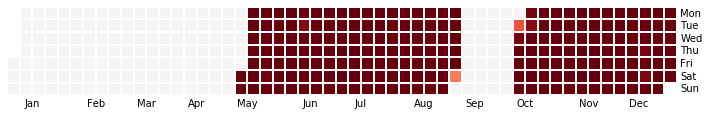

In [411]:
cluster1 = pd.to_datetime(kibera.loc[kibera['dt'] < pd.datetime(2017, 1, 1)]['dt'].dt.date)
print len(cluster1)
plt.figure(figsize=(12, 12))
cluster1_c = pd.Series.value_counts(cluster1)
print len(cluster1_c)
calmap.yearplot(cluster1_c, year=2016)
plt.show()

14243
10


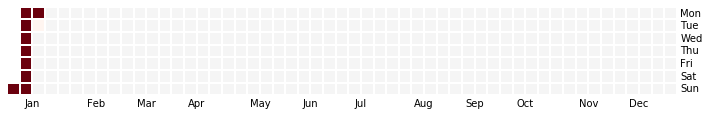

In [408]:
cluster1 = pd.to_datetime(kibera.loc[kibera['dt'] >= pd.datetime(2017, 1, 1)]['dt'].dt.date)
print len(cluster1)

plt.figure(figsize=(12, 12))
cluster1_c = pd.Series.value_counts(cluster1)
print len(cluster1_c)
calmap.yearplot(cluster1_c, year=2017)
plt.show()

In [379]:
kibera_merged = pd.merge(kibera, wind, how='inner', left_on='dt', right_on='date')

In [106]:
kibera_merged2 = pd.merge(kibera_unsc, wind, how='inner', left_on='dt', right_on='date')

In [117]:
#wind_n = kibera_merged[['bin0', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5']]
kibera_merged.head()
#kibera_merged.columns.values


,Unnamed: 0,d,t,date_x,no2,o3,no,so2,temp,humidity,...,date_y,nsec,altm_(hpa),temp (degree_c),dew (degree_c),rh_(percentage),dir_(degrees),spd_(m/s),vis (km),clouds (====)
0,13770,06/05/2016,22:00:25,2016-05-07 00:00:00,2,-2,-13,-33,19.20,84.45,...,2016-06-05 22:00:00,3671550000,1023.0,19,18,94,320,3,10.0,FEW018
1,13800,06/05/2016,22:30:25,2016-05-07 00:30:00,0,0,-14,-33,18.95,83.96,...,2016-06-05 22:30:00,3671551800,1023.0,19,17,88,350,2,10.0,FEW018
2,13830,06/05/2016,23:00:25,2016-05-07 01:00:00,1,-1,-15,-33,19.05,85.03,...,2016-06-05 23:00:00,3671553600,1023.0,18,17,94,30,3,10.0,FEW018
3,13860,06/05/2016,23:30:25,2016-05-07 01:30:00,3,-3,-15,-34,18.84,86.40,...,2016-06-05 23:30:00,3671555400,1024.0,18,17,94,10,3,10.0,FEW018
4,14126,07/05/2016,04:00:13,2016-05-07 06:00:00,3,-2,-8,2,17.93,86.04,...,2016-07-05 04:00:00,3671571600,1022.0,17,15,88,20,4,10.0,SCT008


In [109]:
kibera_merged2.head()
len(kibera_merged2)

7216

In [4]:
def spectral_clustering(df, n_clusters = 6):
    
    feature_design = ["bin%d"%x for x in range(16)]
    print("feature design: " + str(feature_design))
    
    df_na = df.dropna(axis=0, how='any',subset=feature_design) #drops one line
    print("dropping all rows containing NaN in feature matrix: %d -> %d" % (len(df),len(df_na)))
    df_cluster = df_na.drop_duplicates(subset=feature_design)
    print("dropping duplicate rows to make matrix solvable: %d -> %d" % (len(df_na),len(df_cluster)))

    X = df_cluster[feature_design].as_matrix()
    
    spectral = SpectralClustering(n_clusters = n_clusters)
    y_pred = spectral.fit_predict(X)
    
    df_cluster['cluster'] = pd.Series(y_pred)
    
    count = Counter(y_pred)
    print("# of points in each bin:")
    print count.items()
    
    return y_pred

def dbscan(df,eps):
    feature_design = ["bin%d"%x for x in range(16)]
    #print("feature design: " + str(feature_design))
    
    df_na = df.dropna(axis=0, how='any',subset=feature_design) #drops one line
    #print("dropping all rows containing NaN in feature matrix: %d -> %d" % (len(df),len(df_na)))
    X = df_na[feature_design].as_matrix()
    #X = StandardScaler().fit_transform(X)
    
    ####################################
    # Compute DBSCAN
    db = DBSCAN(eps=eps,min_samples=5).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    sil =  metrics.silhouette_score(X, labels)

    print('EPS = %0.3f, Estimated number of clusters: %d, Silhouette Coef: %0.3f' % (eps,n_clusters_,sil))
    
    return n_clusters_, labels, sil
    

In [5]:
files = ["Kibera.csv","kibera_sub.csv", "Scholastica.csv", "scholastica_sub.csv",
         "UNEP.csv", "unep_sub.csv", "Alliance.csv", "alliance_sub.csv", "AllSaints.csv", "allsaints_sub.csv"]


In [391]:


'''
df_sizes = []
merged_sizes = []

for f in files:
    print "--------"
    print f
    df = make_dataframe("data/"+f)
    df_merged = pd.merge(df, wind, how='inner', left_on='dt', right_on='date')
    print "merged! saving to pickle"
    df_sizes.append(len(df))
    merged_sizes.append(len(df_merged))
    df_merged.to_pickle("pickles/"+f.split(".")[0]+".p")
    pickles = ["pickles/"+f.split(".")[0]+".p" for f in files]
'''
for p in pickles:    
    print "--------"
    print p
    dbscan_stats = []
    df_merged = pd.read_pickle(p)
    #'''
    for e in [1.0, 2.5, 5, 10, 20, 30, 50, 60, 70, 80, 100, 150, 200]:
        try:
            v, y, s = dbscan(df_merged,e) 
            dbscan_stats.append((e, v, s))
            print e, v, s
        except Exception:
            pass
    dbscan_stats_files.append(dbscan_stats)
    print "--------"
    
    
    

--------
pickles/Kibera.p
EPS = 5.000, Estimated number of clusters: 1, Silhouette Coef: -0.114
5 1 -0.113894316335
EPS = 10.000, Estimated number of clusters: 23, Silhouette Coef: -0.571
10 23 -0.571379436039
EPS = 20.000, Estimated number of clusters: 28, Silhouette Coef: -0.398
20 28 -0.397610378359
EPS = 30.000, Estimated number of clusters: 12, Silhouette Coef: 0.162
30 12 0.162032350569
EPS = 50.000, Estimated number of clusters: 11, Silhouette Coef: 0.330
50 11 0.33013739312
EPS = 60.000, Estimated number of clusters: 7, Silhouette Coef: 0.502
60 7 0.501998755418
EPS = 70.000, Estimated number of clusters: 5, Silhouette Coef: 0.656
70 5 0.65552001011
EPS = 80.000, Estimated number of clusters: 6, Silhouette Coef: 0.598
80 6 0.597905134781
EPS = 100.000, Estimated number of clusters: 4, Silhouette Coef: 0.676
100 4 0.676085975621
EPS = 150.000, Estimated number of clusters: 3, Silhouette Coef: 0.758
150 3 0.758444607677
EPS = 200.000, Estimated number of clusters: 3, Silhouette C

EPS = 20.000, Estimated number of clusters: 7, Silhouette Coef: 0.480
20 7 0.480257195094
EPS = 30.000, Estimated number of clusters: 3, Silhouette Coef: 0.641
30 3 0.641141709827
EPS = 50.000, Estimated number of clusters: 2, Silhouette Coef: 0.788
50 2 0.787637548513
EPS = 60.000, Estimated number of clusters: 4, Silhouette Coef: 0.731
60 4 0.7314010136
EPS = 70.000, Estimated number of clusters: 1, Silhouette Coef: 0.865
70 1 0.865197022836
EPS = 80.000, Estimated number of clusters: 1, Silhouette Coef: 0.873
80 1 0.87297488433
EPS = 100.000, Estimated number of clusters: 2, Silhouette Coef: 0.882
100 2 0.881746000198
EPS = 150.000, Estimated number of clusters: 2, Silhouette Coef: 0.880
150 2 0.879672737493
EPS = 200.000, Estimated number of clusters: 1, Silhouette Coef: 0.926
200 1 0.925626134927
--------
--------
pickles/allsaints_sub.p
EPS = 5.000, Estimated number of clusters: 21, Silhouette Coef: -0.417
5 21 -0.417149447066
EPS = 10.000, Estimated number of clusters: 27, Silho

In [397]:
import json

json.dump(dbscan_stats_files, open("param_search_results1.json", 'w'))

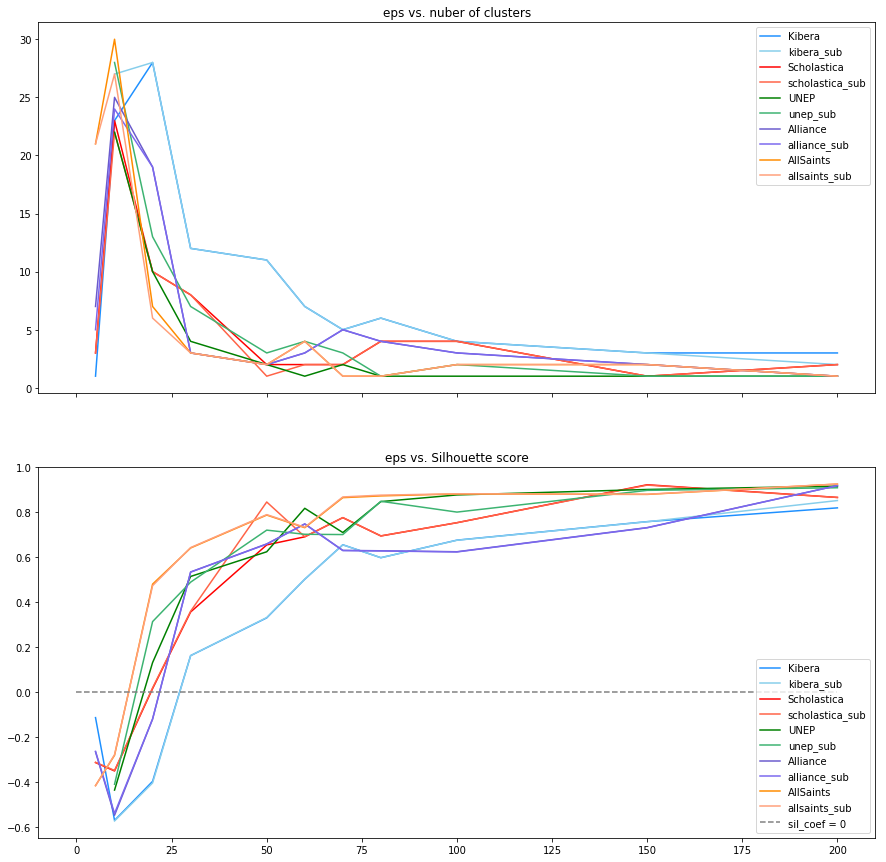

In [402]:
fig, ax = plt.subplots(2, sharex=True, figsize=(15, 15))
names = [ f.split(".")[0] for f in files]

colors = ['dodgerblue','skyblue','r','tomato','g','mediumseagreen','slateblue','mediumslateblue','darkorange','lightsalmon']
for i, stats in enumerate(dbscan_stats_files):
    es = [x[0] for x in stats]
    #clusters = [np.log(x[1]) for x in stats]
    clusters = [x[1] for x in stats]
    sil = [x[2] for x in stats]
    ax[0].plot(es, clusters, color = colors[i], label=names[i])
    ax[1].plot(es, sil, color = colors[i], label=names[i])

ax[1].plot([0, 200],[0,0], linestyle = "--",color="grey",label ='sil_coef = 0')

ax[0].set_title('eps vs. nuber of clusters')
ax[1].set_title('eps vs. Silhouette score')

ax[0].legend()
ax[1].legend(loc=4)

plt.show()
    

model selection shows quite clearly that eps = 50 is perferable

In [413]:
pickles = ["pickles/"+f.split(".")[0]+".p" for f in files]
for f in files: 
    name = f.split(".")[0]
    df_merged = pd.read_pickle("pickles/"+name+".p")
    for e in [30,100]:
        v, y, s = dbscan(df_merged, e)
        result = pd.concat([df_merged['dt'], pd.Series(y)], axis=1, ignore_index=True)
        result.rename(columns = {0:'dt', 1:'cluster'},inplace= True)
        if result.isnull().values.any():
            print "something went wrong here, %s %d %.3f"%(name, v, e)
        else:
            result.to_csv("results/%s_%d_%.3f.csv"%(name, v, e))



EPS = 30.000, Estimated number of clusters: 12, Silhouette Coef: 0.162
EPS = 100.000, Estimated number of clusters: 4, Silhouette Coef: 0.676
EPS = 30.000, Estimated number of clusters: 12, Silhouette Coef: 0.162
EPS = 100.000, Estimated number of clusters: 4, Silhouette Coef: 0.676
EPS = 30.000, Estimated number of clusters: 8, Silhouette Coef: 0.356
EPS = 100.000, Estimated number of clusters: 4, Silhouette Coef: 0.754
EPS = 30.000, Estimated number of clusters: 8, Silhouette Coef: 0.360
EPS = 100.000, Estimated number of clusters: 4, Silhouette Coef: 0.754
EPS = 30.000, Estimated number of clusters: 4, Silhouette Coef: 0.514
EPS = 100.000, Estimated number of clusters: 1, Silhouette Coef: 0.877
EPS = 30.000, Estimated number of clusters: 7, Silhouette Coef: 0.489
EPS = 100.000, Estimated number of clusters: 2, Silhouette Coef: 0.801
EPS = 30.000, Estimated number of clusters: 3, Silhouette Coef: 0.534
EPS = 100.000, Estimated number of clusters: 3, Silhouette Coef: 0.624
EPS = 30.00

In [30]:
df_merged  = pd.read_pickle("pickles/"+"scholastica_sub"+".p")

In [31]:
v, y, s = dbscan(df_merged, 20)
result = pd.concat([df_merged['dt'], pd.Series(y)], axis=1, ignore_index=True)
result.rename(columns = {0:'dt', 1:'cluster'},inplace= True)


EPS = 20.000, Estimated number of clusters: 10, Silhouette Coef: 0.019


In [32]:
Counter(y)

Counter({-1: 1111,
         0: 5650,
         1: 9,
         2: 5,
         3: 6,
         4: 10,
         5: 5,
         6: 9,
         7: 4,
         8: 12,
         9: 6})

In [10]:
_, re_cluser_y, __ = dbscan(df_merged.loc[result['cluster'] == 0], 15)

EPS = 15.000, Estimated number of clusters: 20, Silhouette Coef: -0.077


In [11]:
Counter(re_cluser_y)

Counter({-1: 813,
         0: 4884,
         1: 5,
         2: 5,
         3: 6,
         4: 5,
         5: 19,
         6: 4,
         7: 2,
         8: 5,
         9: 8,
         10: 6,
         11: 5,
         12: 6,
         13: 7,
         14: 5,
         15: 8,
         16: 5,
         17: 5,
         18: 4,
         19: 5})

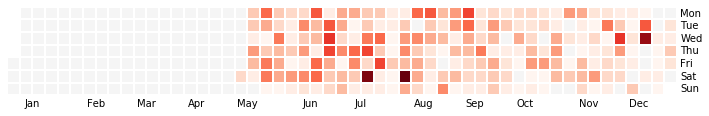

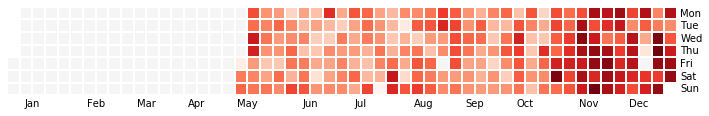

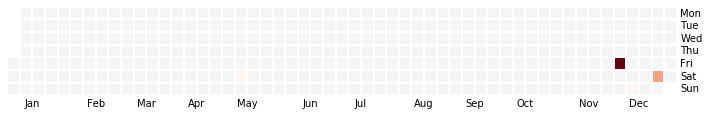

In [33]:
for x in [-1,0,8]:#range(-1,10):
    cluster1 = result.loc[result['cluster'] == x]['dt']
    plt.figure(figsize=(12, 12))
    cluster1_c = pd.Series.value_counts(cluster1)
    calmap.yearplot(cluster1_c, year=2016)
    plt.show()

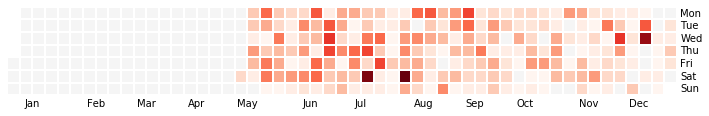

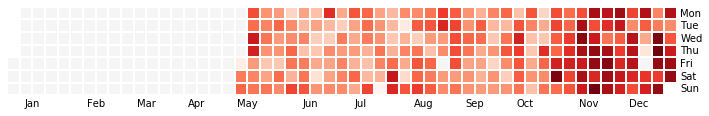

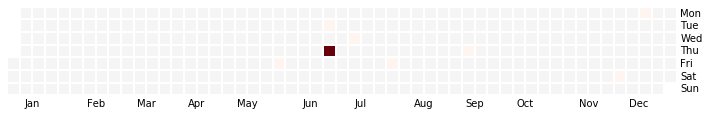

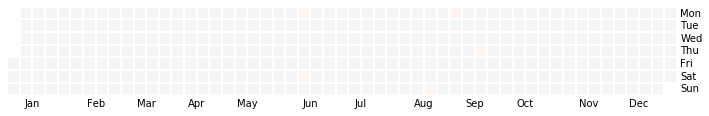

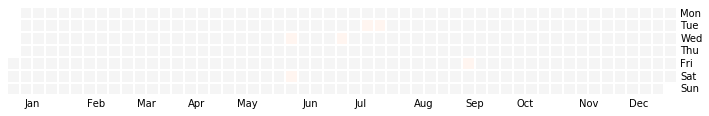

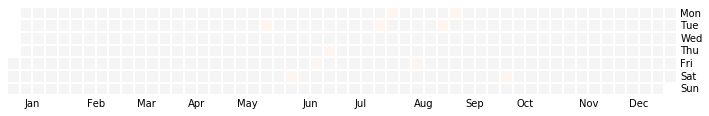

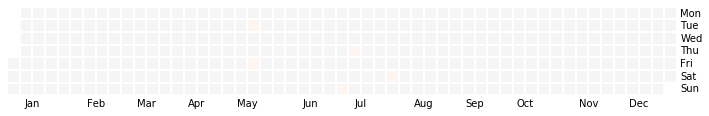

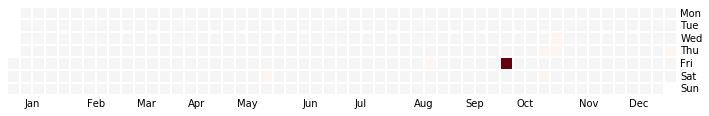

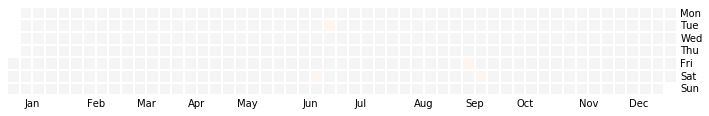

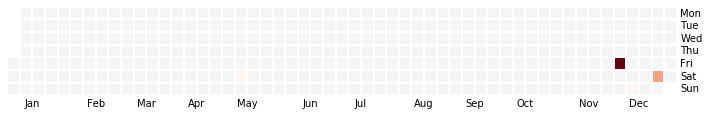

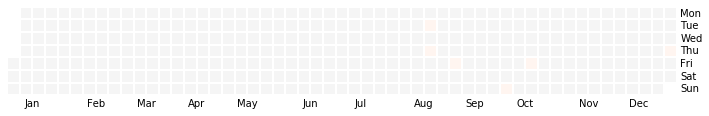

In [34]:
for x in range(-1,10):
    cluster1 = result.loc[result['cluster'] == x]['dt']
    plt.figure(figsize=(12, 12))
    cluster1_c = pd.Series.value_counts(cluster1)
    calmap.yearplot(cluster1_c, year=2016)
    plt.show()

### ------------- seperation -------------

feature design: ['bin0', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15']
dropping all rows containing NaN in feature matrix: 318282 -> 318282
# of points in each bin:
[(0, 232148), (1, 1), (2, 3258), (3, 68368), (4, 370), (5, 14137)]


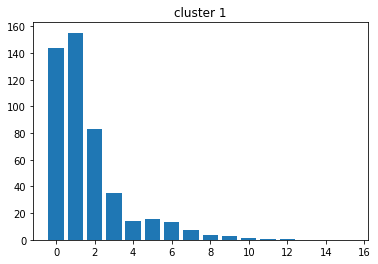

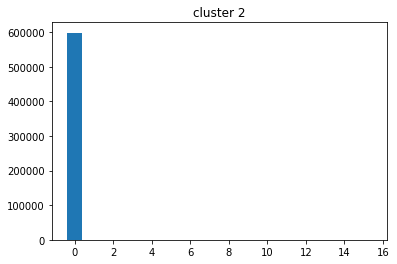

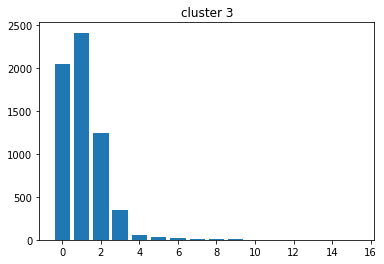

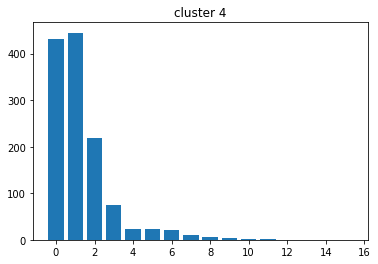

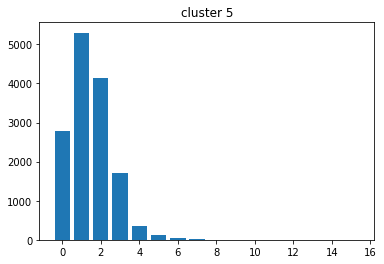

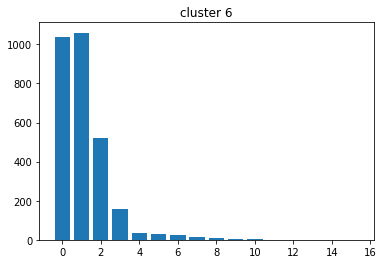

In [119]:
kibera_clustered, kmeans = cluster_a_file(kibera)
plot_cluster_centers(kmeans)

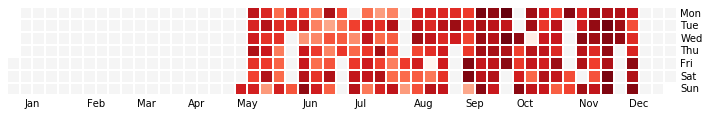

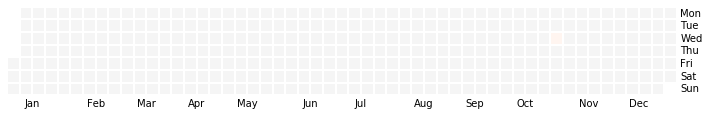

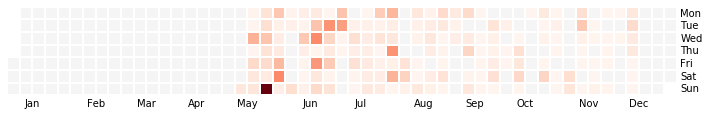

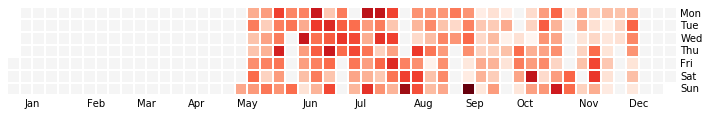

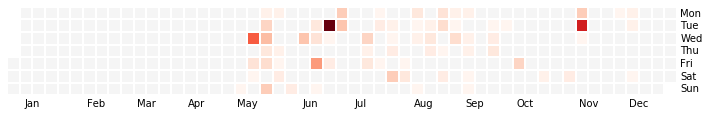

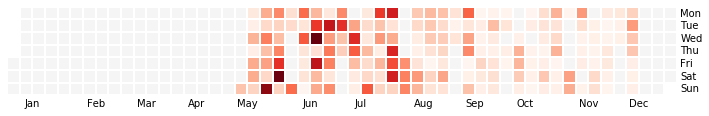

In [142]:

for x in range(6):
    cluster1 = kibera_clustered.loc[kibera_clustered['cluster'] == x]['date']
    plt.figure(figsize=(12, 12))
    cluster1_c = pd.Series.value_counts(cluster1)
    calmap.yearplot(cluster1_c, year=2016)
    plt.show()

In [143]:
kibera_clustered.head()

,date,time,dt,no2,o3,no,so2,temp,humidity,pm1,...,bin7,bin8,bin9,bin10,bin11,bin12,bin13,bin14,bin15,cluster
7121,2016-06-05,00:04:25,06/05/16 02:04:25,-2,0,-468,-6,19.57,85.09,4.11,...,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7122,2016-06-05,00:05:25,06/05/16 02:05:25,-2,0,-17,-37,19.55,85.86,4.21,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7123,2016-06-05,00:06:25,06/05/16 02:06:25,-1,0,-17,-38,19.55,86.07,4.24,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7124,2016-06-05,00:07:25,06/05/16 02:07:25,-1,0,-17,-40,19.54,85.40,4.93,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7125,2016-06-05,00:08:25,06/05/16 02:08:25,-2,0,-16,-38,19.54,86.28,3.91,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


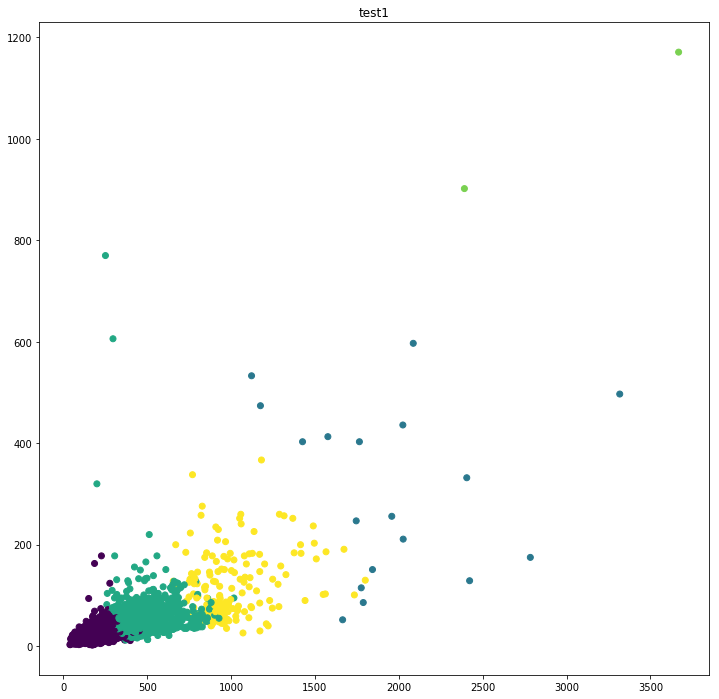

In [94]:
plt.figure(figsize=(12, 12))
X = kibera_np

X_filter = X[:4000] 
X_filter2 = X[365485:368485]

plt.scatter(X_filter[:, 0], X_filter[:, 3], c=y_pred[:4000])
plt.scatter(X_filter2[:, 0], X_filter2[:, 3], c=y_pred[365485:368485])
plt.title("test1")
plt.show()

In [60]:
X.shape[0]

368485

In [49]:
from collections import Counter
count = Counter(y_pred)
count.items()

[(0, 288118), (1, 1), (2, 11090), (3, 67893), (4, 1383)]

In [ ]:
possible ways to compare them
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
    #print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
    #print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
    